In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

/Users/nathzi1505/Desktop/Private/Online-Courses/Time-Series/Course_Notebooks/venv/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load datasets
df = pd.read_csv('../Data/HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'

df.head()

,Employees
Date,
1990-01-01,1064.5
1990-02-01,1074.5
1990-03-01,1090.0
1990-04-01,1097.4
1990-05-01,1108.7


Text(0, 0.5, 'Thousands of Persons')

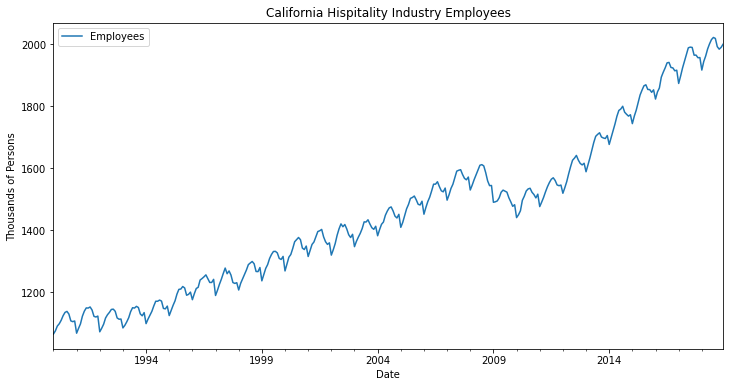

In [3]:
ax = df.plot(figsize=(12, 6))
ax.set_title('California Hispitality Industry Employees')
ax.set_ylabel('Thousands of Persons')

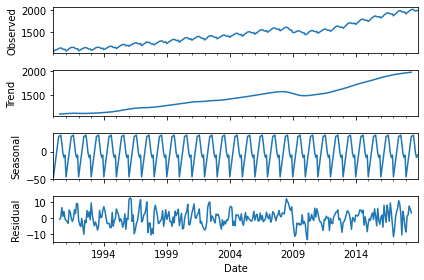

In [5]:
result = seasonal_decompose(df['Employees'], model='add')
result.plot();

In [7]:
auto_arima(df['Employees'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, 1, 12)   Log Likelihood               -1098.307
Date:                            Mon, 15 Jun 2020   AIC                           2210.614
Time:                                    03:25:35   BIC                           2237.559
Sample:                                         0   HQIC                          2221.343
                                            - 348                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.005      0.081      0.936      -0.010       0.011
ar.L1          0.9222      0.046     20.112      0.000       0.832       1.012
ma.L1         -0.9438      0.070    -13.457      0.000      -1.081      -0.806
ma.L2          0.1316      0.060      2.201      0.028       0.014       0.249
ar.S.L12       0.9977      0.001    719.452      0.000       0.995       1.000
ma.S.L12      -0.7574      0.042    -17.930      0.000      -0.840      -0.675
sigma2        29.1948      1.702     17.154      0.000      25.859      32.531
===================================================================================
Ljung-Box (Q):                       32.12   Jarque-Bera (JB):                66.33
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                            -0.09
Prob(H) (two-sided):                  0.45   Kurtosis:                         5.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
len(df)

348

In [9]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [11]:
model = SARIMAX(train['Employees'], order=(1,1,2), seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, 1, 12)   Log Likelihood               -1058.058
Date:                            Mon, 15 Jun 2020   AIC                           2128.116
Time:                                    03:27:08   BIC                           2151.001
Sample:                                01-01-1990   HQIC                          2137.240
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9241      0.043     21.248      0.000       0.839       1.009
ma.L1         -0.9585      0.070    -13.687      0.000      -1.096      -0.821
ma.L2          0.1498      0.061      2.468      0.014       0.031       0.269
ar.S.L12       0.9973      0.001    728.627      0.000       0.995       1.000
ma.S.L12      -0.7519      0.044    -17.159      0.000      -0.838      -0.666
sigma2        28.7642      1.684     17.078      0.000      25.463      32.065
===================================================================================
Ljung-Box (Q):                       29.90   Jarque-Bera (JB):                73.32
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
start = len(train)
end = len(train) + len(test) - 1

In [13]:
predictions = results.predict(start, end, typ='levels').rename('SARIMAX')

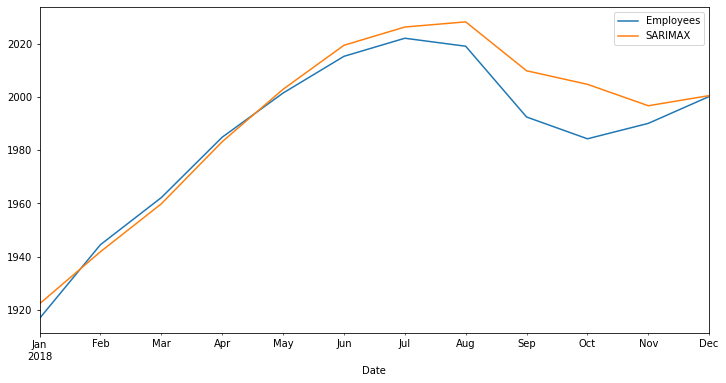

In [14]:
test['Employees'].plot(figsize=(12,6), legend=True)
predictions.plot(legend=True)

In [16]:
rmse(test['Employees'], predictions)

8.812210672306174

In [17]:
mean_squared_error(test['Employees'], predictions)

77.65505693310682

In [18]:
model = SARIMAX(df['Employees'], order=(1,1,2), seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, 1, 12)   Log Likelihood               -1098.252
Date:                            Mon, 15 Jun 2020   AIC                           2208.504
Time:                                    03:29:42   BIC                           2231.600
Sample:                                01-01-1990   HQIC                          2217.700
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.561      0.000       0.836       1.013
ma.L1         -0.9441      0.070    -13.512      0.000      -1.081      -0.807
ma.L2          0.1288      0.060      2.145      0.032       0.011       0.247
ar.S.L12       0.9972      0.001    701.330      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.322      0.000      -0.834      -0.664
sigma2        29.2969      1.717     17.064      0.000      25.932      32.662
===================================================================================
Ljung-Box (Q):                       31.48   Jarque-Bera (JB):                67.43
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
start = len(df)
end = len(df) + 11

In [20]:
forecast = results.predict(start, end, typ='levels').rename('SARIMAX')

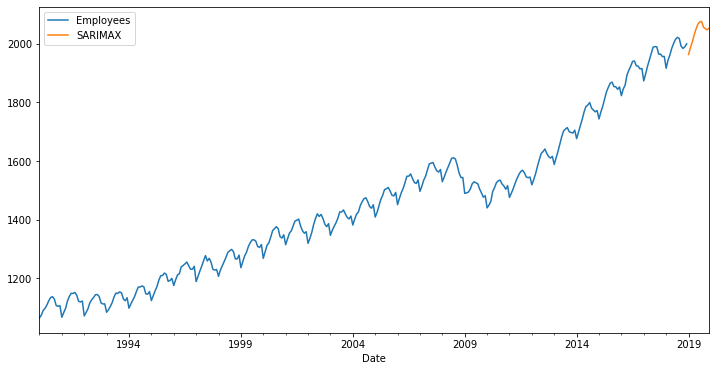

In [21]:
df['Employees'].plot(figsize=(12,6), legend=True)
forecast.plot(legend=True)